In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

In [18]:
df=pd.read_csv(r"CAR DETAILS FROM CAR DEKHO.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [22]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [23]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [24]:
#Here we are going to create a new column and try to find out how old each car is
df["Current Year"]=2021
df["age"]=df["Current Year"]-df["year"]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current Year,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [25]:
df.drop(["year"],axis=1,inplace=True)
df.drop(["Current Year"],axis=1,inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


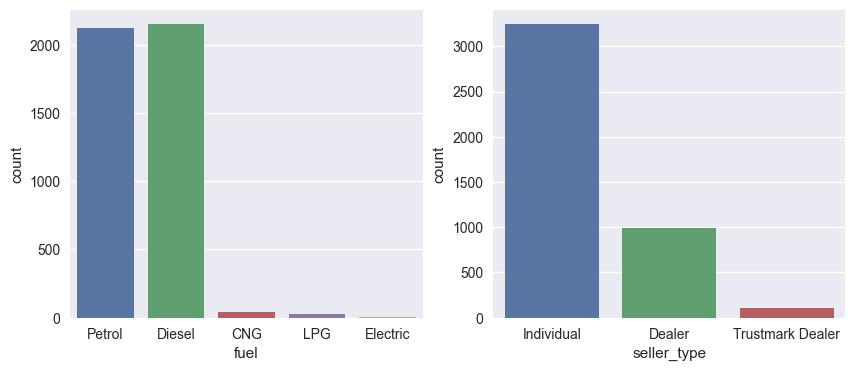

In [26]:
#Basic EDA
plt.style.use('seaborn')
fig = plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.countplot(x='fuel', data=df)
plt.subplot(1,2,2)
sns.countplot(x='seller_type', data=df)
plt.show()

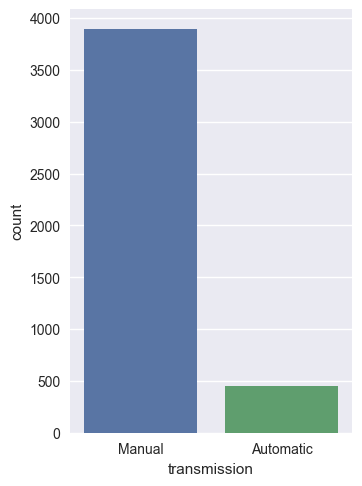

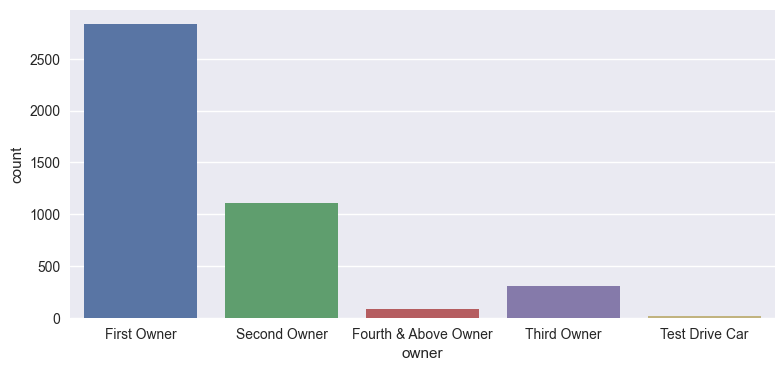

In [27]:
plt.subplot(1,2,1)
sns.countplot(x='transmission', data=df)
fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
sns.countplot(x='owner', data=df)
plt.show()

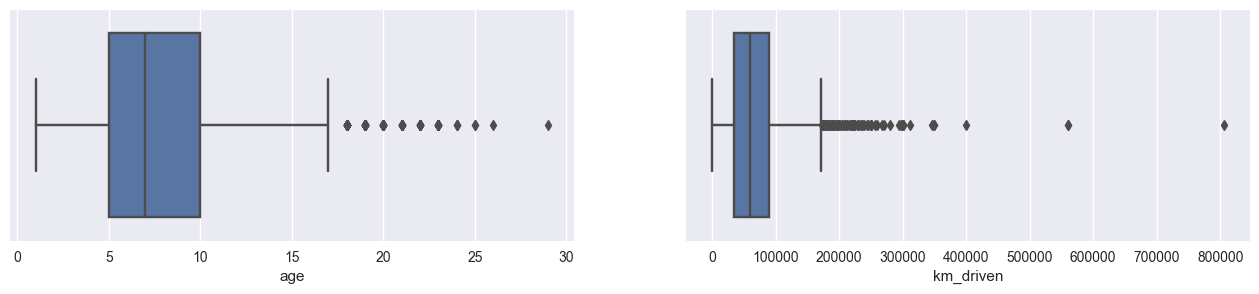

In [28]:
fig = plt.figure(figsize=[16,3])
plt.subplot(1,2,1)
sns.boxplot(x='age', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='km_driven', data=df)
plt.show()

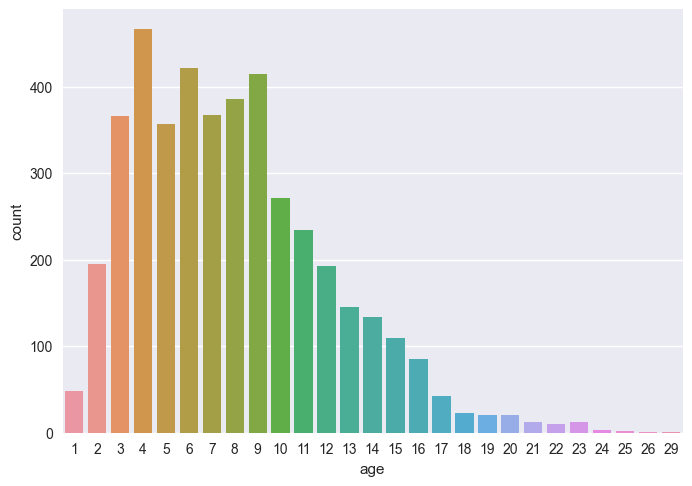

<Figure size 2000x400 with 0 Axes>

In [29]:
sns.countplot(x='age', data=df)
fig = plt.figure(figsize=[20,4])
plt.show()

In [30]:
print(df['owner'].unique())


['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [31]:
owner_encoded_values = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df=df.replace(owner_encoded_values)
df.rename(columns = {'Number of Past Owners)':'Number of Past Owners'},inplace = True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,1,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,1,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,1,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,1,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,2,7


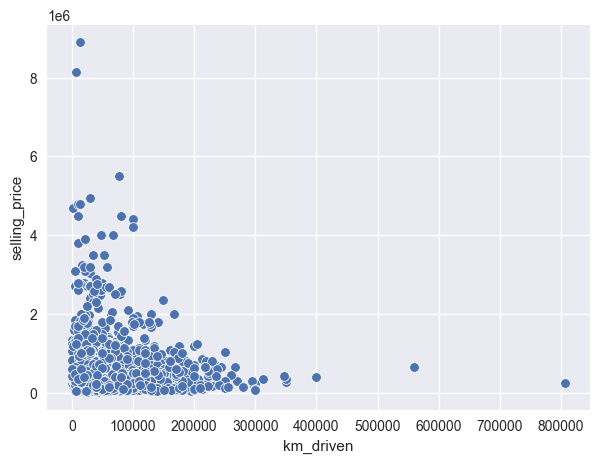

In [32]:
plt.figure(figsize=(7,5))
p1=sns.scatterplot(x='km_driven',y='selling_price',data=df)

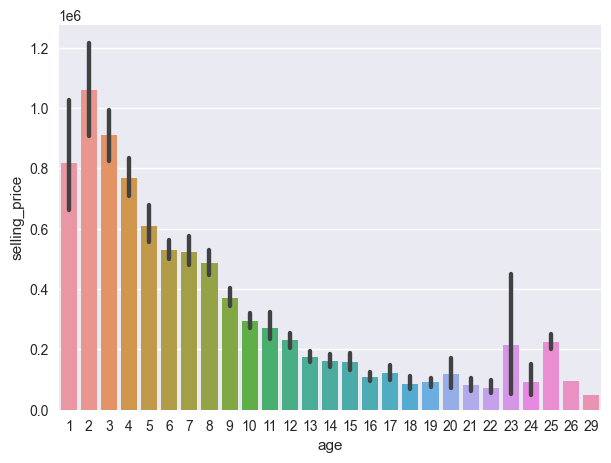

In [33]:
plt.figure(figsize=(7,5))
p1=sns.barplot(x='age',y='selling_price',data=df)

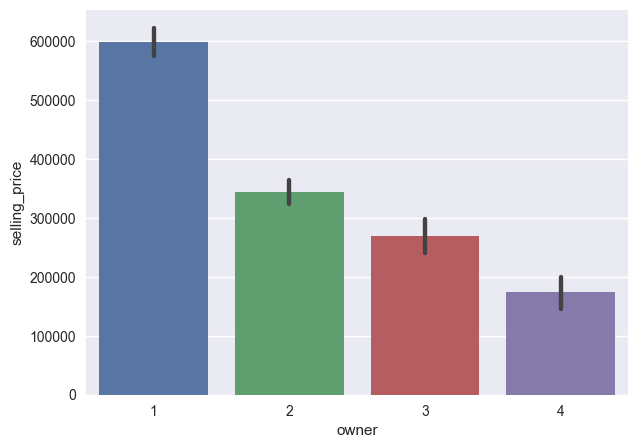

In [34]:
plt.figure(figsize=(7,5))
list=[1,2,3,4]
filtered_data = df.loc[df['owner'].isin(list)]
p1=sns.barplot(x='owner',y='selling_price',data=filtered_data)

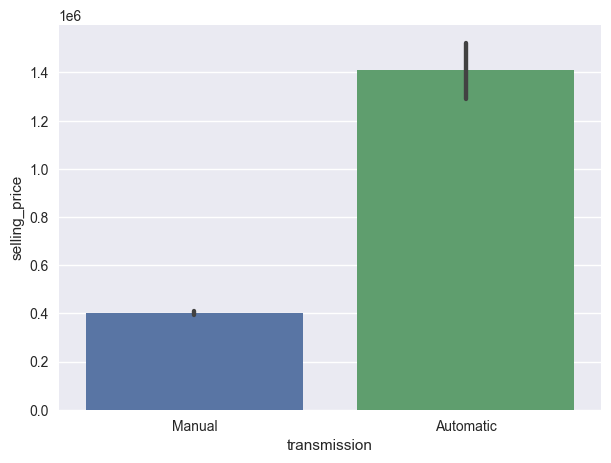

In [35]:
plt.figure(figsize=(7,5))
p1=sns.barplot(x='transmission',y='selling_price',data=df)

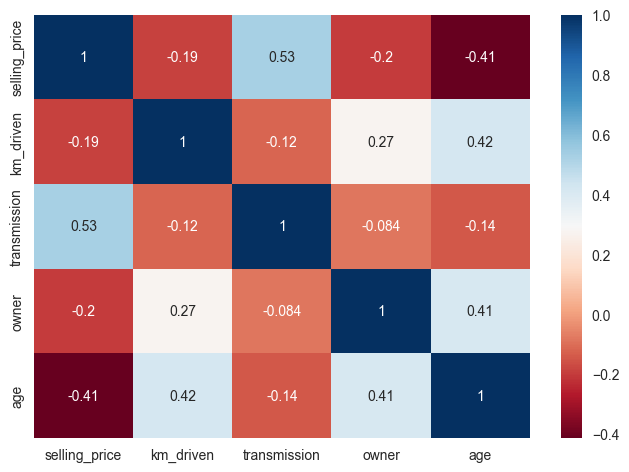

In [36]:
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [37]:
#One-hot encoding
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
df1=pd.get_dummies(df,columns=['fuel','seller_type'],drop_first=False)
df1.head()

,name,selling_price,km_driven,transmission,owner,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti 800 AC,60000,70000,0,1,14,0,0,0,0,1,0,1,0
1,Maruti Wagon R LXI Minor,135000,50000,0,1,14,0,0,0,0,1,0,1,0
2,Hyundai Verna 1.6 SX,600000,100000,0,1,9,0,1,0,0,0,0,1,0
3,Datsun RediGO T Option,250000,46000,0,1,4,0,0,0,0,1,0,1,0
4,Honda Amaze VX i-DTEC,450000,141000,0,2,7,0,1,0,0,0,0,1,0


<AxesSubplot:>

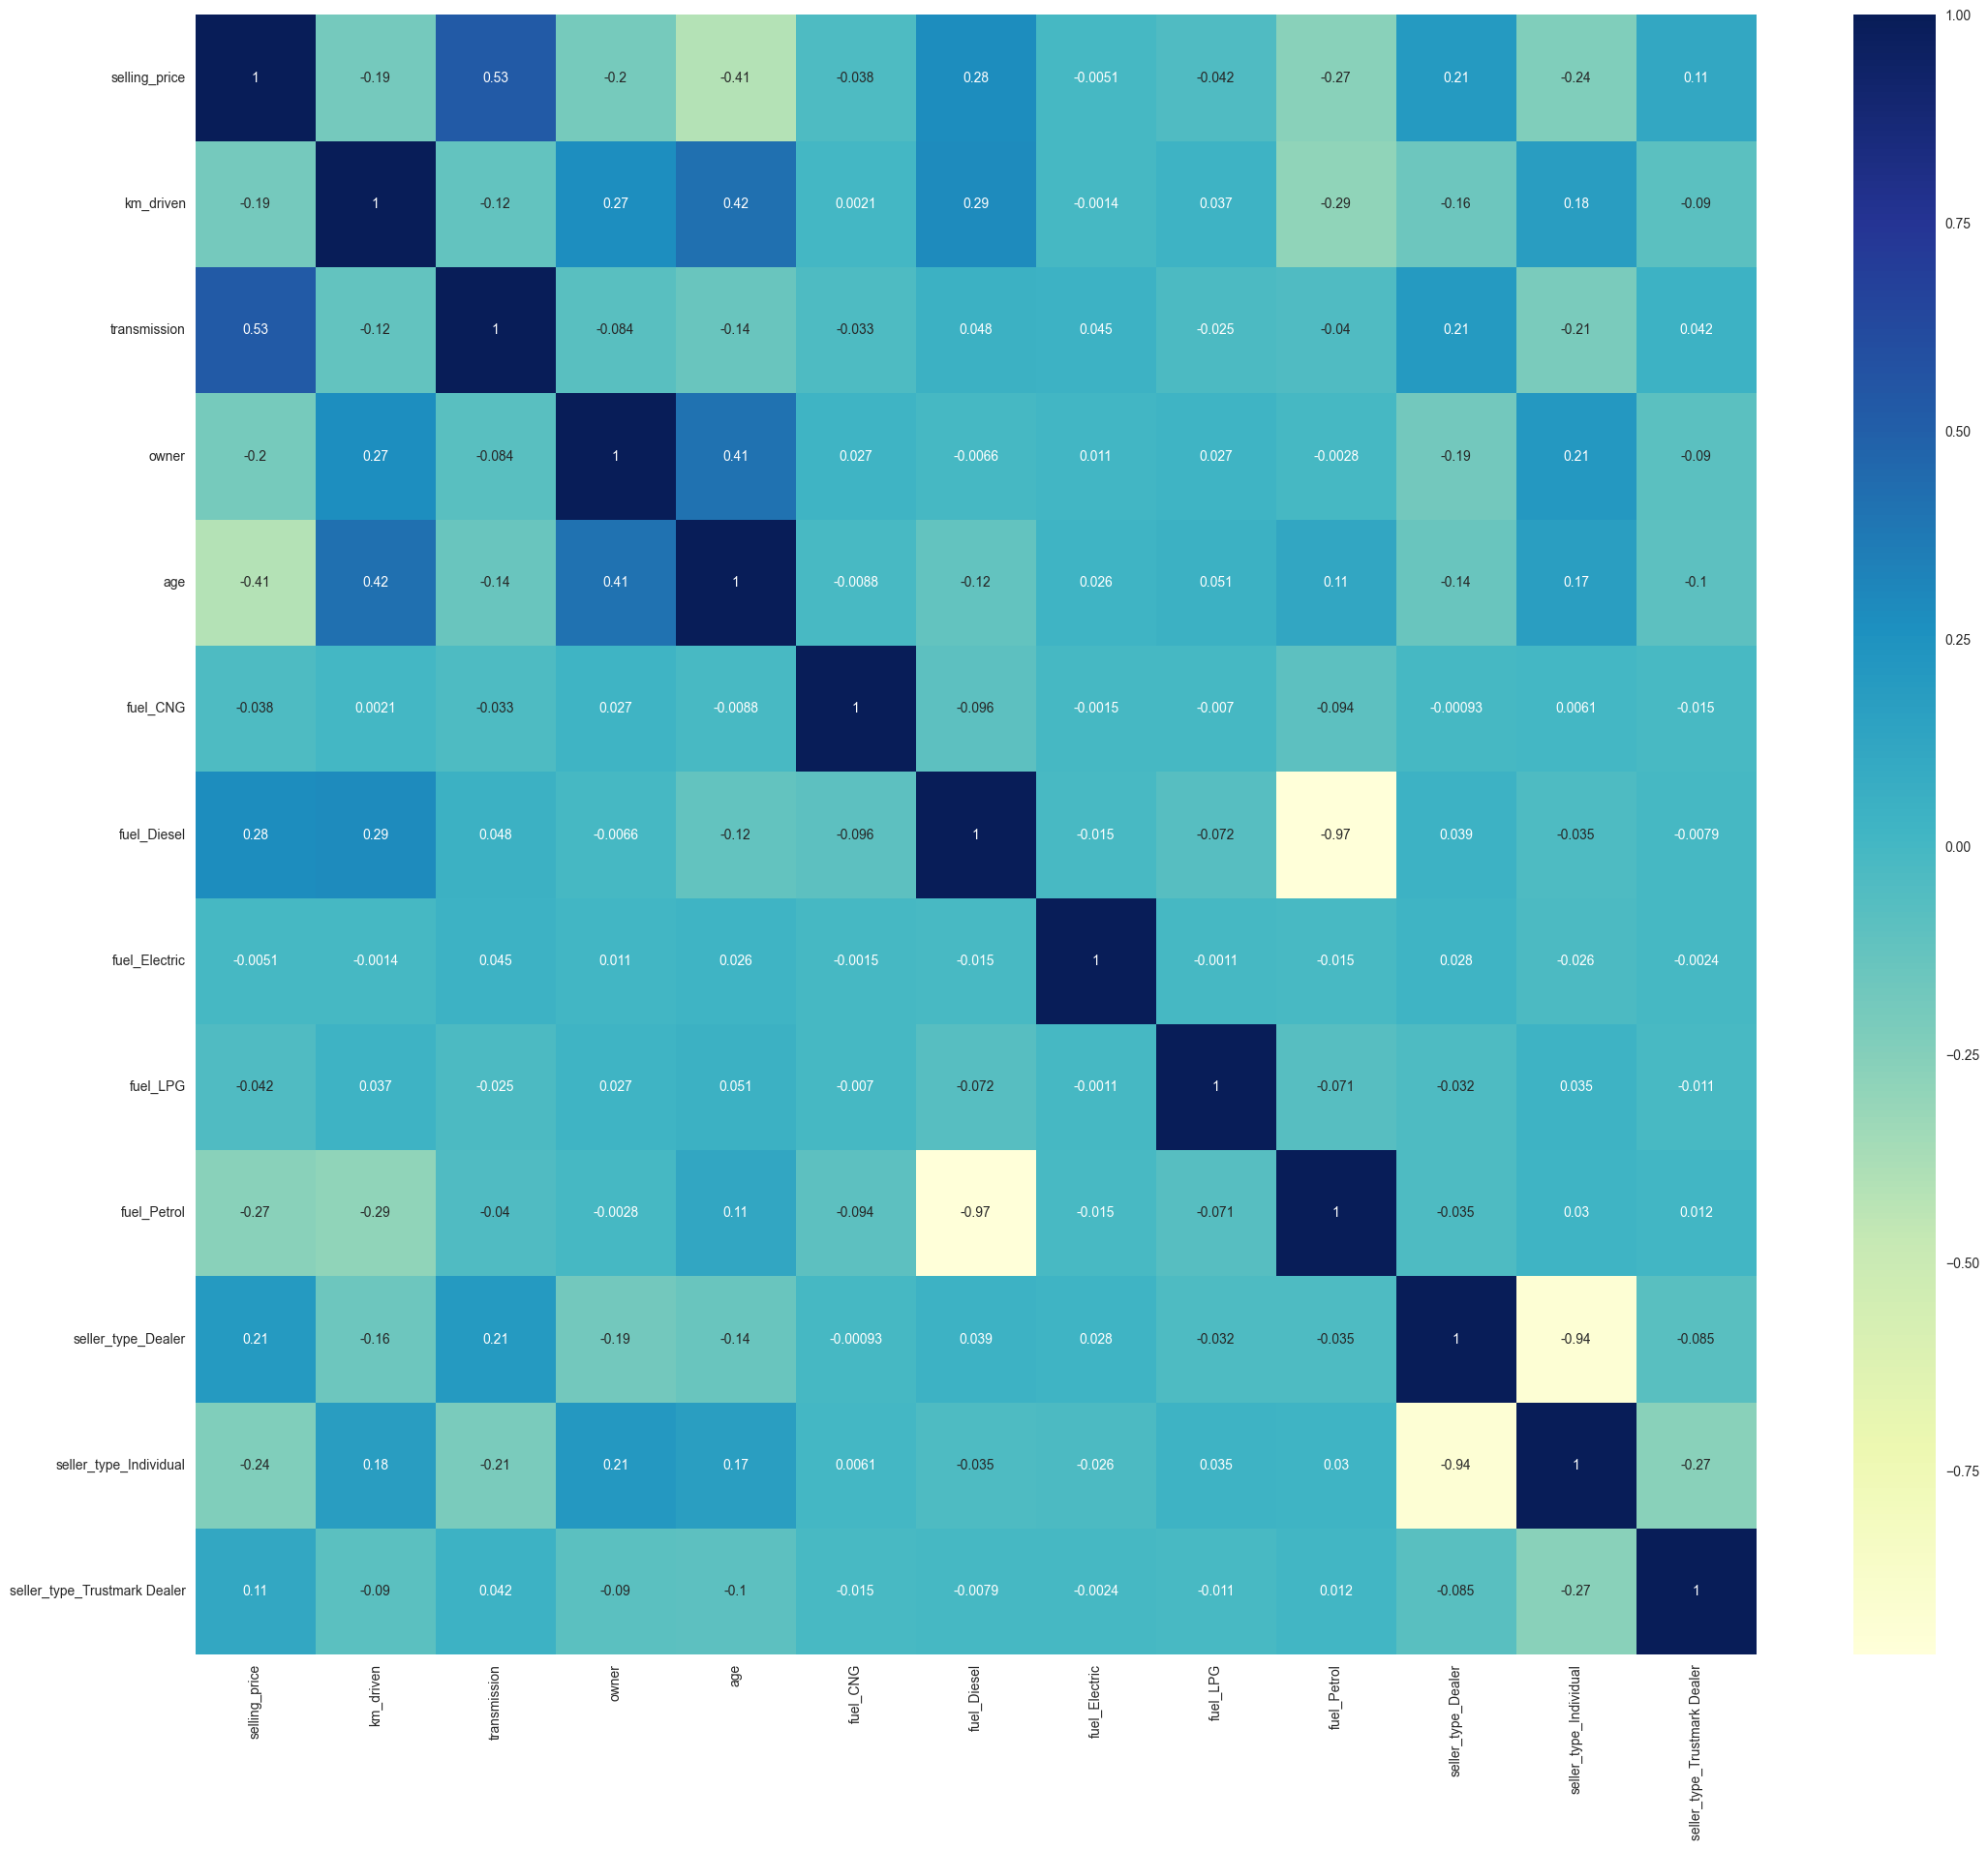

In [38]:
correlations = df1.corr()
ind=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(df1[ind].corr(),annot=True,cmap="YlGnBu")

In [76]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
df1_train,df1_test = train_test_split(df1, test_size=0.2, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['selling_price','km_driven','age']

#scaling the training data(fitting the parameters and transforming the values)
df1_train[var]=scaler.fit_transform(df1_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
df1_test[var]=scaler.transform(df1_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!
X_test=df1_test.drop(columns=['name','selling_price'],axis=1)
y_test=df1_test['selling_price']

X_train=df1_train.drop(columns=['name','selling_price'],axis=1)
y_train=df1_train['selling_price']

In [77]:
X_test.head()

,km_driven,transmission,owner,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
621,45974,0,1,6,0,1,0,0,0,0,0,1
2752,52000,0,1,9,0,1,0,0,0,1,0,0
4210,40000,0,1,3,0,1,0,0,0,0,1,0
1335,50000,0,1,5,0,1,0,0,0,0,1,0
1090,14000,0,1,4,0,1,0,0,0,1,0,0


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression() 
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.5069250104460217


Feature: 0, Score: -1.02191
Feature: 1, Score: 848399.16698
Feature: 2, Score: -10364.45369
Feature: 3, Score: -35371.62335
Feature: 4, Score: 50758.03279
Feature: 5, Score: 344792.61224
Feature: 6, Score: -548302.70228
Feature: 7, Score: 102220.64946
Feature: 8, Score: 50531.40779
Feature: 9, Score: -36487.91879
Feature: 10, Score: -100442.34241
Feature: 11, Score: 136930.26120


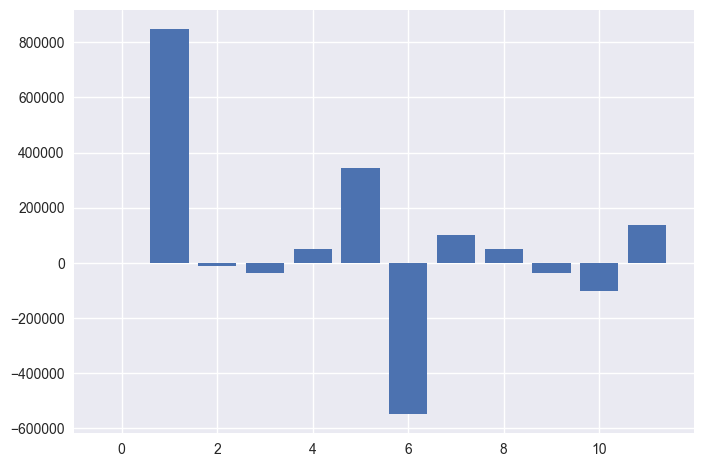

In [42]:
#Feature selection
from matplotlib import pyplot
# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
X_train.head()

,km_driven,transmission,owner,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
1451,185000,0,1,9,0,1,0,0,0,0,1,0
728,61624,1,2,8,0,0,0,0,1,1,0,0
1270,35925,0,1,6,0,0,0,0,1,1,0,0
4076,56600,0,1,7,1,0,0,0,0,1,0,0
3232,120000,0,3,9,0,1,0,0,0,0,1,0


In [80]:
#Random Forest
from sklearn.model_selection import train_test_split
X_test=df1.drop(columns=['name','selling_price'],axis=1)
y_test=df1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
r2_score(y_test, pred_rf)

C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6426090332953227

In [81]:
features = df1.columns.tolist()
features.remove('selling_price')
print(features)

['name', 'km_driven', 'transmission', 'owner', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer']


In [82]:
X = df1[features]
y = df1["selling_price"]
X=X.drop(columns=['name'],axis=1)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [84]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [85]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.2s
[CV] END max_depth=5, max_feat

C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.1s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.0s


C:\Users\vjubi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_
{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}
predictions=rf_random.predict(X_test)


In [88]:
from sklearn import metrics
print("R2 score:", metrics.r2_score(y_test, predictions))

R2 score: 0.7421730780266296


In [89]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names

    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

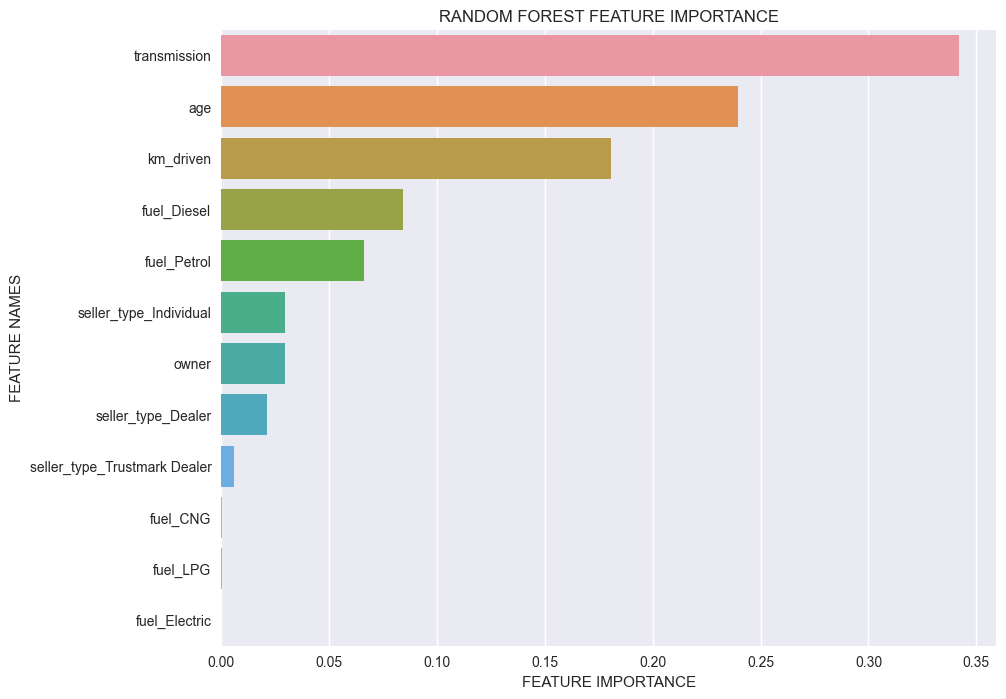

In [90]:
plot_feature_importance(rf_random.best_estimator_.feature_importances_,X_train.columns,'RANDOM FOREST')

Feature: 0, Score: 0.18061
Feature: 1, Score: 0.34208
Feature: 2, Score: 0.02956
Feature: 3, Score: 0.23976
Feature: 4, Score: 0.00054
Feature: 5, Score: 0.08427
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00024
Feature: 8, Score: 0.06605
Feature: 9, Score: 0.02142
Feature: 10, Score: 0.02966
Feature: 11, Score: 0.00581


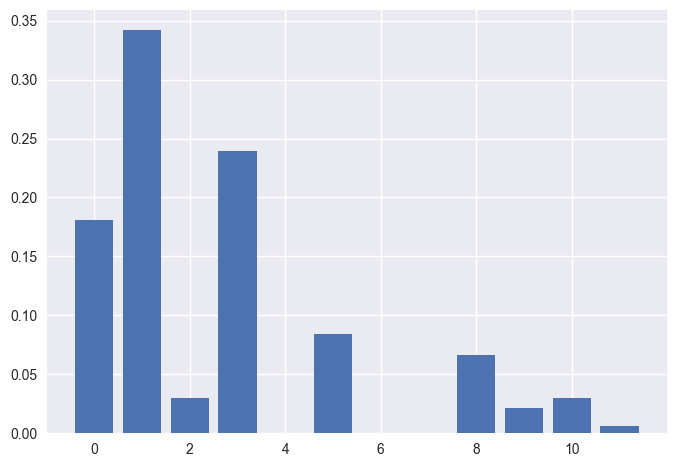

In [91]:
# get importance
importance = rf_random.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [56]:
# Take the first word from each name
df['Make'] = df['name'].str.split().str[0]

In [57]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age,Make
0,Maruti 800 AC,60000,70000,Petrol,Individual,0,1,14,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,0,1,14,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,0,1,9,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,0,1,4,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,0,2,7,Honda


In [58]:
df['Make'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

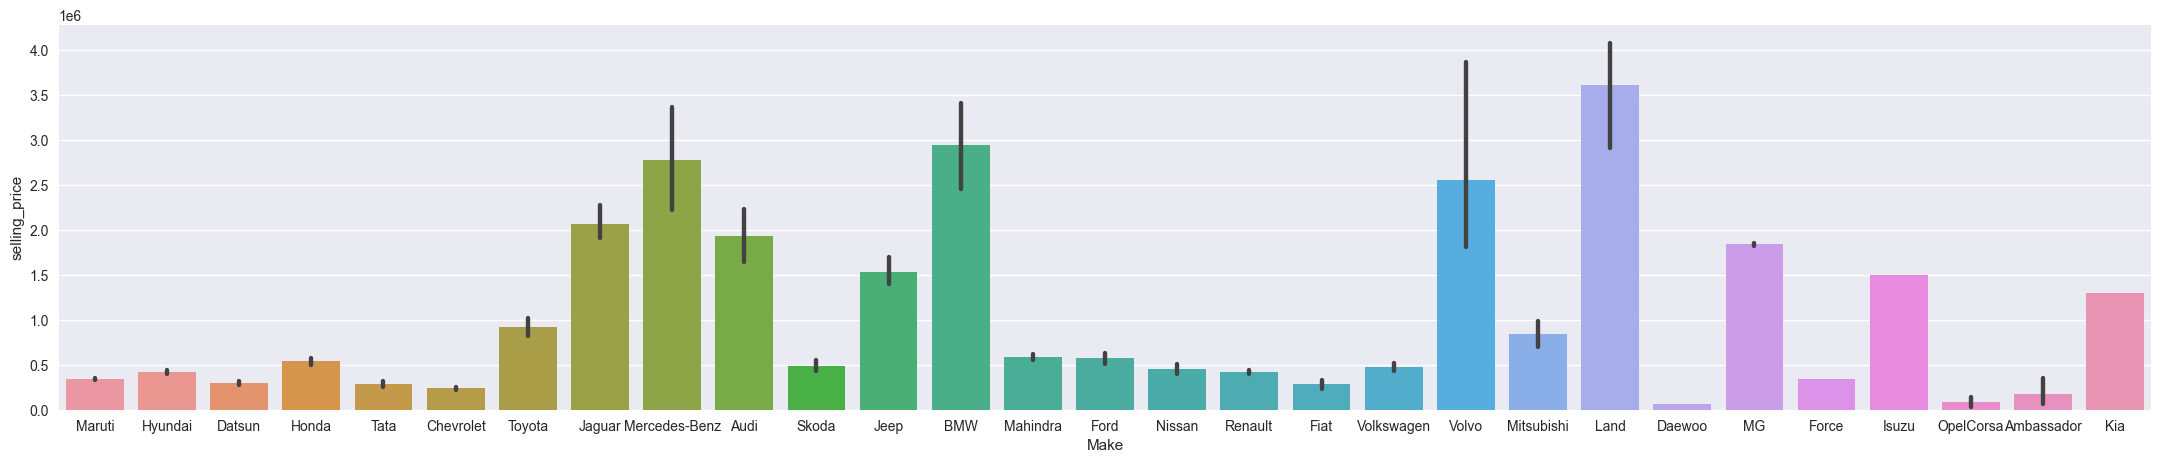

In [59]:
plt.figure(figsize=(27,5))
p1=sns.barplot(x='Make',y='selling_price',data=df)
plt.show()

In [60]:
# Import xgboost ensemble model
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV

#creates a xgbRegressor object
regressor=xgboost.XGBRegressor()

In [61]:
#Hyperparamter_Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [62]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [63]:
#train on the RandomSearchCv object to get best estimators
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=3,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [64]:
#getting the best estimators
print(random_cv.best_estimator_)

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [65]:
#getting the best params
random_cv.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.15,
 'booster': 'gbtree',
 'base_score': 1}

In [66]:
 from numpy import nan
# reinitializing the regressor object with the best probable estimators
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
# fitting the xgbRegressor on our training data
regressor.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [68]:
# fetching the predictions on our test data
predictions2=regressor.predict(X_test)

In [69]:
R2 = metrics.r2_score(y_test,predictions2)
R2

0.6578562065703056